<style type="text/css">
.tf  {border-collapse:collapse;border-spacing:0;width:100%}
.tf td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tf th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tf .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tf">
<thead>
  <tr>
    <th class="tg-0pky col1">Name</th>
    <th class="tg-0pky col2">Hatim Sawai</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">UID No.</td>
    <td class="tg-0pky col2">2021300108</td>
  </tr>
</tbody>
</table>

## <p style="text-align:center;font-weight:500;">Experiment 9</p>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../docs/pledge.jpg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      <strong>Sentiment Analysis on Social Media Data</strong>
      <br>
      1. Select one of the social media channels you would like to analyze the data of - Twitter, Instagram, Reddit, YouTube
      <br>
      2. Select value/s for relevant attributes like  'author', 'topic', 'mention', #tag', 'country' etc. to narrow down the scope of what you would like to analyze.
      <br>
      3. Fetch the narrowed down data across a specific time window using python libraries. This time-window would allow to compare and contrast sentiments across different times and for different events that occur during the time-window.
      <br>
      4. Process the text and do sentiment analysis on it using relevant libraries (Twitter lexicon would require a more specialized library)
      <br>
      5. Plot the results and state your analysis of the results.
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">CASE STUDY</td>
    <td class="tg-0pky col2">
      <p style="font-size:50px; font-family:Times New Roman; text-align:center">"The Dogefather"</p>
      <p style="font-size:20px; font-family:Times New Roman; text-align:center">Elon Musk</p>    
      <br>
      <br>
      <a href="https://dogecoin.com/">Doge coin</a> is a cryptocurrency, which was a joke and meme about the payment system. As you can see, from the name and logo, Dogecoin is derived from the Shibe doge meme. The biggest feature of Doge Coin is that it can be mined indefinitely without reducing the issuance volume. In general, value is inversely proportional to supply. So, from an economic point of view, Doge coin was nothing more than a joke. But <a href="https://twitter.com/elonmusk">Elon Musk</a> started to <strong>add value to it via his Twitter account.</strong>
      <br>
      <br>
      <strong>Datasets:</strong>
      <br>
      <a href="https://www.kaggle.com/datasets/varpit94/dogecoin-data">Dogecoin Data 2014-2021</a>
      <br>
      <a href="https://www.kaggle.com/datasets/hisanai/elon-musk-tweets-5-years">Elon Musk Tweets 2017-2022</a>
      <br>
    </td>
  </tr>
</tbody>
</table> 

### 1. Importing Libraries & Datasets

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import calendar
from textblob import TextBlob
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# read csv file
df_doge = pd.read_csv("../Datasets/DOGE-USD.csv")
df1 = pd.read_csv('../Datasets/Elon 2017-2018.csv')
df2 = pd.read_csv('../Datasets/Elon 2018-2019.csv')
df3 = pd.read_csv('../Datasets/Elon 2019-2020.csv')
df4 = pd.read_csv('../Datasets/Elon 2020-2021.csv')
df5 = pd.read_csv('../Datasets/Elon 2021-2022.csv')

### 2. Preprocessing the Data

In [96]:
df_doge = df_doge.drop(columns=["Adj Close"])  # identical with column 'Close'
df_doge["Date"] = pd.to_datetime(df_doge["Date"])

df_doge["Year"] = df_doge["Date"].dt.year
df_doge["Month_Num"] = df_doge["Date"].dt.month
df_doge["Month"] = df_doge["Month_Num"].apply(lambda x: calendar.month_abbr[x])

df_doge["YYYYMM"] = pd.to_datetime(df_doge["Date"], format="%Y%m", errors="coerce")
df_doge["YYYYMM"] = pd.to_datetime(df_doge["Date"]).dt.strftime("%Y%m")

df_doge["Close_log"] = np.log(df_doge["Close"])
df_doge["Return"] = df_doge["Close"] / df_doge["Open"][0] - 1

In [97]:
# combine all dataframes
df = pd.concat([df1, df2, df3, df4, df5])

# find tweets which contain 'doge'
df = df[df["Tweet"].str.contains("doge", case=False)]
df = df.reset_index(drop=True)
df = df[["Date", "Tweet"]]
df["YYYYMM"] = pd.to_datetime(df["Date"], format="%Y%m", errors="coerce")
df["YYYYMM"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m")
df.to_csv("../Datasets/Elon_Doge.csv", index=False)

In [98]:
df = pd.read_csv("../Datasets/Elon_Doge.csv")
print(df.shape[0], "tweets found containing 'doge'")
df.head()

110 tweets found containing 'doge'


,Date,Tweet,YYYYMM
0,2019-04-02 20:38:38+00:00,Dogecoin value may vary https://t.co/UWerAhPv63,201904
1,2019-04-02 20:16:58+00:00,Dogecoin rulz https://t.co/flWWUgAgLU,201904
2,2019-04-02 19:40:46+00:00,@dogecoin Uh oh,201904
3,2019-04-02 09:24:39+00:00,@Tom_Heats Dogecoin might be my fav cryptocurr...,201904
4,2020-12-20 09:30:04+00:00,One word: Doge,202012


<div style="page-break-before: always;"></div>

### 3. Dogecoin Trend Analysis

It was confirmed that **the price and volumes of Dogecoin has risen significantly from 2021.** This is due to the fact that **Elon Musk** has been tweeting about Dogecoin. The following graph shows the price and volume of Dogecoin from 2014 to 2021.

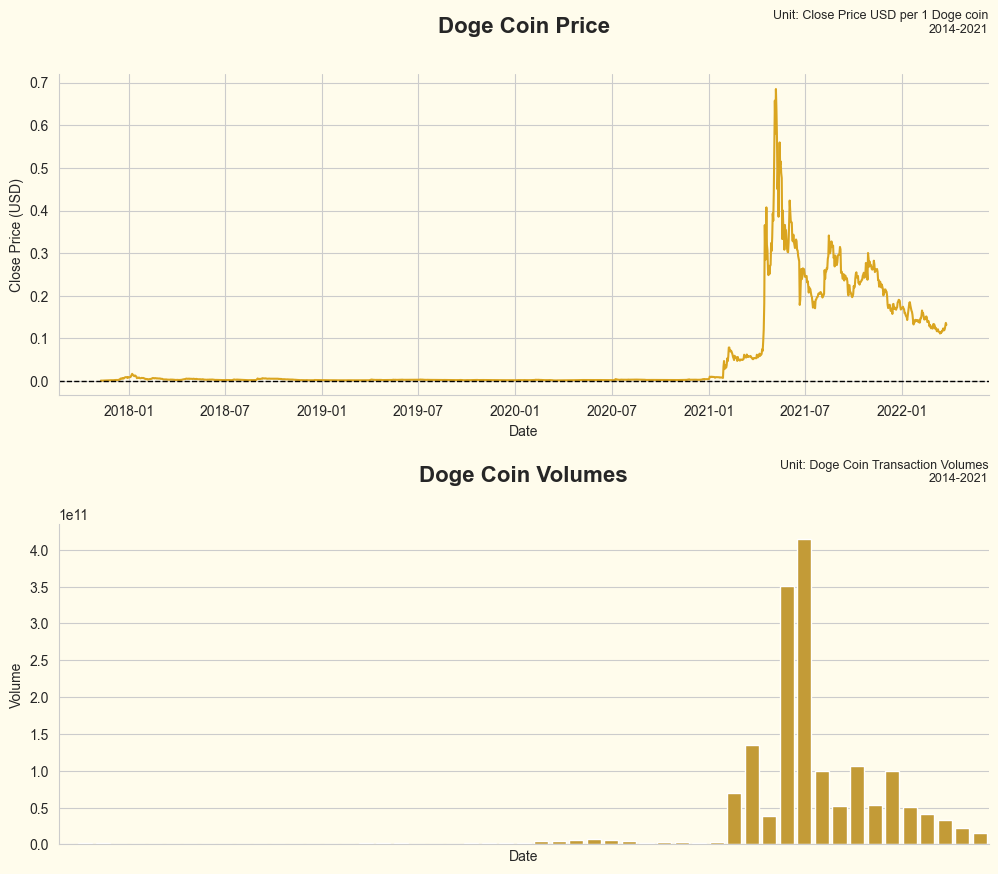

In [99]:
df_hm = pd.pivot_table(df_doge, values="Volume", index=["Year", "Month_Num"], aggfunc=np.sum)
df_hm.reset_index(level=0, inplace=True)
df_hm.reset_index(level=0, inplace=True)
df_hm["Date"] = pd.to_datetime(
    (df_hm.Year * 100 + df_hm.Month_Num).apply(str), format="%Y%m"
).dt.strftime("%Y%m")
df_hm["Volume_log"] = np.log(df_hm["Volume"])

fig = plt.figure(figsize=(12, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
fig.patch.set_facecolor("#FFFCEC")
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(data=df_doge, x="Date", y="Close", color="goldenrod")
ax1.patch.set_facecolor("#FFFCEC")
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines["right"].set_visible(False)
ax1 = plt.gca().spines["top"].set_visible(False)
ax1 = plt.gca().spines["left"].set_visible(True)
ax1 = plt.gca().spines["bottom"].set_visible(True)

ax1 = plt.ylabel("Close Price (USD)")
ax1 = plt.axhline(0, 8, 0, color="black", linestyle="--", linewidth="1")
ax1 = plt.title(
    "Unit: Close Price USD per 1 Doge coin\n2014-2021", fontsize=9, loc="right"
)
ax1 = plt.title(
    "Doge Coin Price", fontsize=16, fontweight="heavy", loc="center", pad=30
)

ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(x="Date", y="Volume", data=df_hm, color="goldenrod")
ax2.patch.set_facecolor("#FFFCEC")
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines["right"].set_visible(False)
ax2 = plt.gca().spines["top"].set_visible(False)
ax2 = plt.gca().spines["left"].set_visible(True)
ax2 = plt.gca().spines["bottom"].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.title(
    "Unit: Doge Coin Transaction Volumes\n2014-2021", fontsize=9, loc="right"
)
ax2 = plt.title(
    "Doge Coin Volumes", fontsize=16, fontweight="heavy", loc="center", pad=30
)

I analyzed the trend more closely by taking the natural logarithm of the price and volume of Doge Coin. The following graph shows the price and volume of Dogecoin from 2014 to 2021.
In this case, it was confirmed that **there was a significant price increase in 2017, although not as much as the increase in 2021.**

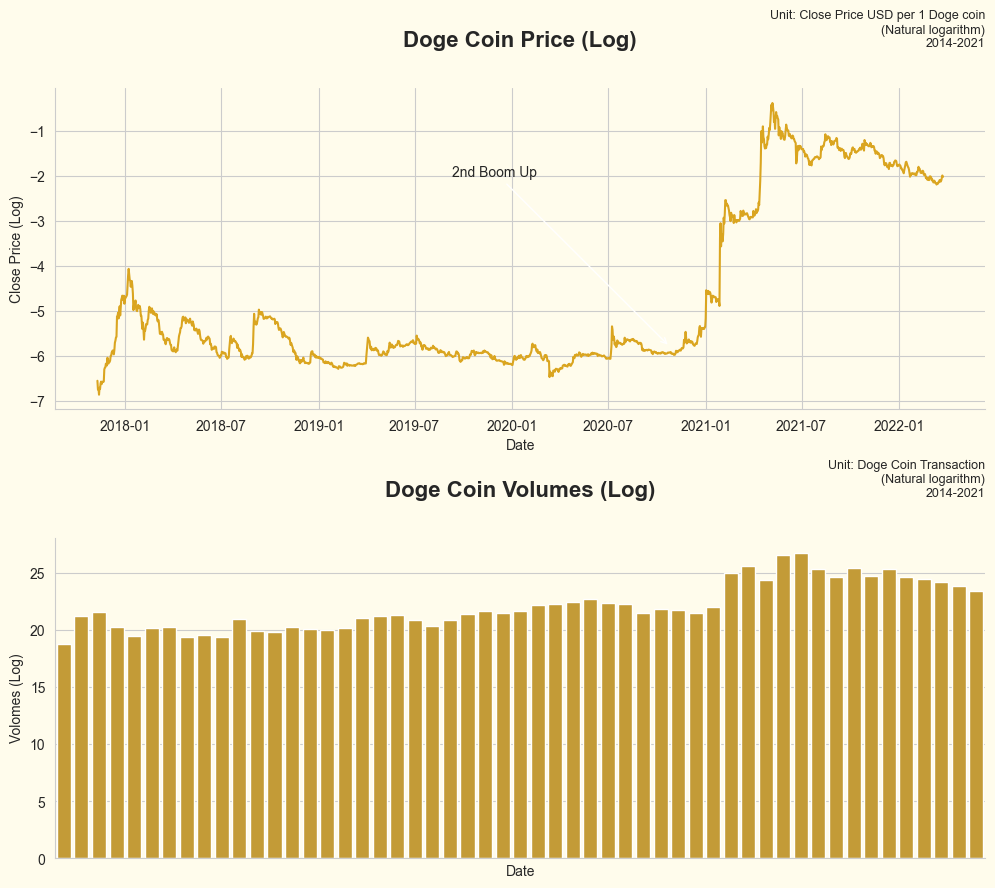

In [100]:
fig = plt.figure(figsize=(12, 10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
fig.patch.set_facecolor("#FFFCEC")
fig.patch.set_alpha(1.0)

ax1 = plt.subplot(2, 1, 1)
ax1 = sns.lineplot(data=df_doge, x="Date", y="Close_log", color="goldenrod")
ax1.patch.set_facecolor("#FFFCEC")
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines["right"].set_visible(False)
ax1 = plt.gca().spines["top"].set_visible(False)
ax1 = plt.gca().spines["left"].set_visible(True)
ax1 = plt.gca().spines["bottom"].set_visible(True)

ax1 = plt.ylabel("Close Price (Log)")
ax1 = plt.annotate(
    "1st Boom Up",
    xy=(pd.to_datetime("2017-02-25"), -8.3),
    xytext=(pd.to_datetime("2016-03-10"), -4),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", facecolor="black"),
)
ax1 = plt.annotate(
    "2nd Boom Up",
    xy=(pd.to_datetime("2020-10-25"), -5.8),
    xytext=(pd.to_datetime("2019-09-10"), -2),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", facecolor="black"),
)

ax1 = plt.title(
    "Unit: Close Price USD per 1 Doge coin\n(Natural logarithm)\n2014-2021",
    fontsize=9,
    loc="right",
)
ax1 = plt.title(
    "Doge Coin Price (Log)", fontsize=16, fontweight="heavy", loc="center", pad=30
)
# semi-colon for hide text before graph output
ax2 = plt.subplot(2, 1, 2)
ax2 = sns.barplot(x="Date", y="Volume_log", data=df_hm, color="goldenrod")
ax2.patch.set_facecolor("#FFFCEC")
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines["right"].set_visible(False)
ax2 = plt.gca().spines["top"].set_visible(False)
ax2 = plt.gca().spines["left"].set_visible(True)
ax2 = plt.gca().spines["bottom"].set_visible(True)
ax2 = plt.xticks([])

ax2 = plt.ylabel("Volomes (Log)")

ax2 = plt.title(
    "Unit: Doge Coin Transaction\n(Natural logarithm)\n2014-2021",
    fontsize=9,
    loc="right",
)
ax2 = plt.title(
    "Doge Coin Volumes (Log)", fontsize=16, fontweight="heavy", loc="center", pad=30
)
# semi-colon for hide text before graph output

<div style="page-break-before: always;"></div>

### 3. Sentiment Analysis of Elon Musk's Tweets on Dogecoin

In [101]:
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "pos"
    elif analysis.sentiment.polarity == 0:
        return "neu"
    else:
        return "neg"

In [102]:
df["sentiment"] = df["Tweet"].apply(get_sentiment)
df.to_csv("../Datasets/Elon_Doge.csv", index=False)
df = pd.read_csv("../Datasets/Elon_Doge.csv")
df.head()

,Date,Tweet,YYYYMM,sentiment
0,2019-04-02 20:38:38+00:00,Dogecoin value may vary https://t.co/UWerAhPv63,201904,neu
1,2019-04-02 20:16:58+00:00,Dogecoin rulz https://t.co/flWWUgAgLU,201904,neu
2,2019-04-02 19:40:46+00:00,@dogecoin Uh oh,201904,neu
3,2019-04-02 09:24:39+00:00,@Tom_Heats Dogecoin might be my fav cryptocurr...,201904,pos
4,2020-12-20 09:30:04+00:00,One word: Doge,202012,neu


The sentiment analysis of Elon Musk's tweets on Dogecoin was conducted using the **TextBlob** library. The following graph shows the sentiment of Elon Musk's tweets on Dogecoin from 2017 to 2022.   
**His tweets were mostly positive, or neutral** but these tweets had a **significant impact on the price** and volume of Dogecoin.

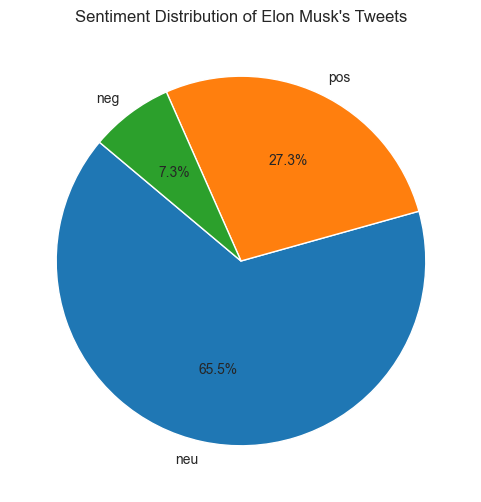

In [103]:
# Sentiment distribution
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6, 6))
pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Distribution of Elon Musk's Tweets")
plt.show()

Elon Musk **first mentioned Dogecoin in April 2019.** He tweeted about Dogecoin in 2019, but the price did not rise significantly. However, he made **a lot of Twitter in February 2021**, which was the catalyst for the price increase.

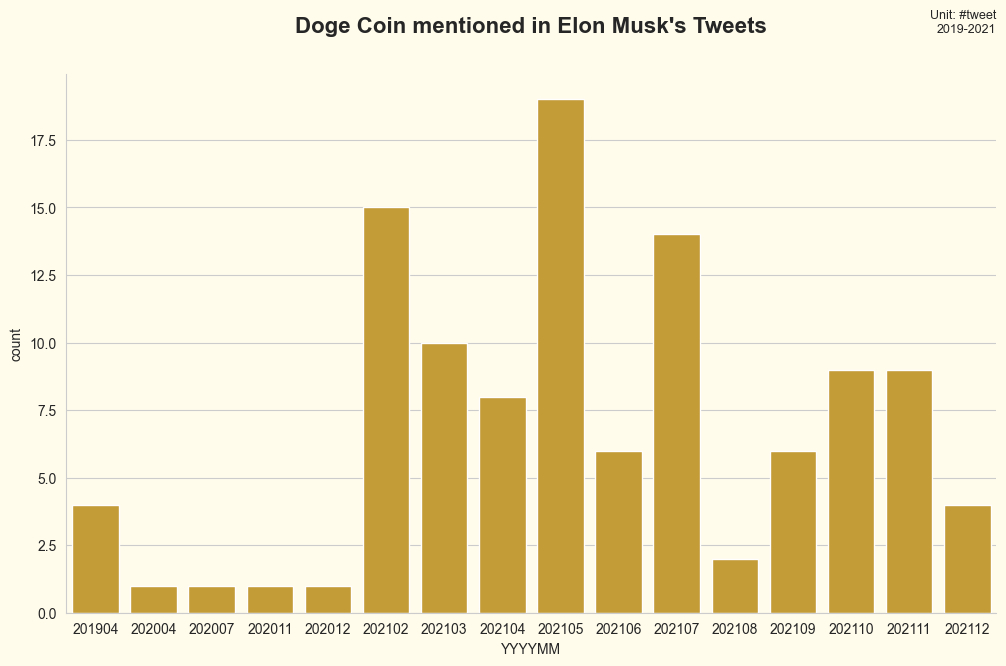

In [104]:
fig = plt.figure(figsize=(12, 7))
fig.patch.set_facecolor("#FFFCEC")
fig.patch.set_alpha(1.0)

ax2 = sns.countplot(x="YYYYMM", data=df, color="goldenrod")
ax2.patch.set_facecolor("#FFFCEC")
ax2.patch.set_alpha(1.0)

ax2 = plt.gca().spines["right"].set_visible(False)
ax2 = plt.gca().spines["top"].set_visible(False)
ax2 = plt.gca().spines["left"].set_visible(True)
ax2 = plt.gca().spines["bottom"].set_visible(True)

ax2 = plt.title("Unit: #tweet\n2019-2021", fontsize=9, loc="right")
ax2 = plt.title(
    "Doge Coin mentioned in Elon Musk's Tweets",
    fontsize=16,
    fontweight="heavy",
    loc="center",
    pad=30,
)

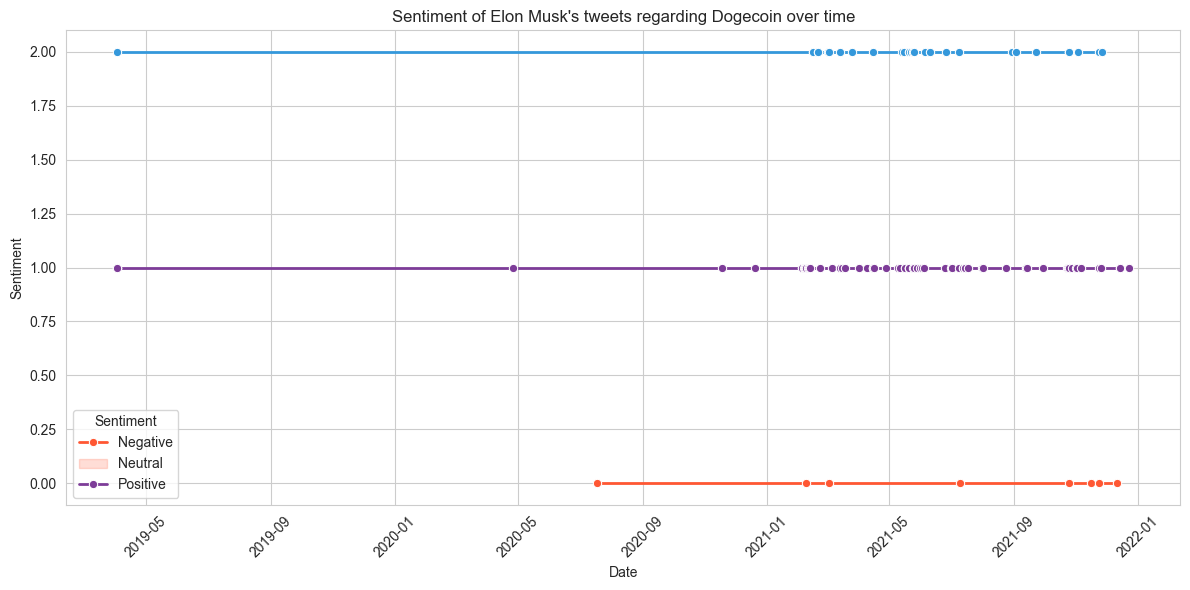

In [105]:
# Map sentiment labels to numeric values for legend
sentiment_mapping = {"neg": 0, "neu": 1, "pos": 2}
df["sentiment_numeric"] = df["sentiment"].map(sentiment_mapping)
df["Date"] = pd.to_datetime(df["Date"])

# Plot the sentiment of Elon Musk's tweets regarding Dogecoin over time
sns.set_style("whitegrid")
custom_palette = {0: "#FF5733", 1: "#7D3C98", 2: "#3498DB"}

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="Date",
    y="sentiment_numeric",
    marker="o",
    hue="sentiment_numeric",
    palette=custom_palette,
    linewidth=2,
)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.title("Sentiment of Elon Musk's tweets regarding Dogecoin over time")
plt.xticks(rotation=45)
plt.legend(["Negative", "Neutral", "Positive"], title="Sentiment")
plt.tight_layout()
plt.show()

If you had bought Dogecoin right after Elon Musk's Tweets in 2021, you would have earned 20-50% or more in just a week's time. However, it is unknown whether Elon Musk's influence has fallen or whether the liquidity of the cryptocurrency market has increased, but now it cannot be expected that there will be only profits.

Overtime many of elon's negative tweets have also been seen, which has led to a decrease in the price of Dogecoin. This is a clear indication that **Elon Musk's tweets have a significant impact on the price and volume of Dogecoin.**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">In this experiment we learned how to perform sentiment analysis on social media data. We analyzed the trend of Dogecoin and sentiment of Elon Musk's tweets on Dogecoin. We also learned how to fetch data from Twitter and perform sentiment analysis on it.
    </td>
  </tr>
</tbody>
</table> 